# 环境配置

## 装载google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

## 定位到目录下方

In [0]:
import os
os.chdir("/content/drive/My Drive/LSTM")
!ls

# mat文件处理

## scipy函数来实现读取mat文件

In [0]:
from scipy.io import loadmat

m = loadmat("BSrf1000.mat")
print(m)
print(m.keys())


## 考虑将mat转化成csv文件来解决
原来的想法，可是后续处理又增加内容，所以就先使用
df.to_csv方法来进行转化，实现对应部分的内容先转为test和train来进行运算处理

In [0]:
import scipy.io as sio

## 变成dataframe，导入pandas,处理BaseStationnum0
截取后10行的数据来做预测（前期考虑）,已经取消使用此方法
直接读取第一列作为文件内容，先试运行看看结果
此方法的一大错误：/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
无法得到正确的结果，会直接导出两列的csv文件，无法得到一列的csv，未知为什么会出现这种情况？

In [0]:
import pandas as pd
print(m["BaseStationnum0"])
print("=====================================")
# df0 = pd.DataFrame(m["BaseStation()"]) 可以导出所有的结果
# 以下方法直接读取出第一列来进行运算
df0 = pd.DataFrame(m["BaseStationnum0"])[0]
print(df0.tail())
df0.to_csv("train.csv")

# 简单预测？？？

## 尝试1：取出文件的第二列来作为首次预测数据
此方法不好，直接dataFrame来读取，失败：dataFrame无法读到一列来直接导出来，使用数组来转化实现


In [0]:
'''
import csv
# read
with open("train.csv","r",encoding = "utf-8") as f:
  reader = csv.reader(f)
  rows = [row for row in reader]
print(rows)
print("===============================")
# get one column of it
with open("train.csv","r",encoding = "utf-8") as f:
  reader = csv.reader(f)
  column = [row[1] for row in reader]
print(column)
# 新建立一个csv文件
'''

[['', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], ['0', '49', '24', '17', '12', '10', '8', '7', '6', '5', '5', '5', '4', '4', '3', '3', '3', '3', '3', '3', '3'], ['1', '49', '25', '16', '12', '10', '8', '7', '6', '5', '5', '5', '4', '4', '3', '3', '3', '3', '3', '3', '3'], ['2', '50', '24', '16', '12', '10', '8', '7', '6', '5', '5', '5', '4', '4', '4', '3', '3', '3', '3', '3', '3'], ['3', '49', '25', '16', '12', '10', '8', '7', '6', '6', '5', '5', '4', '4', '3', '3', '3', '3', '3', '3', '3'], ['4', '50', '25', '16', '12', '10', '8', '7', '6', '5', '5', '4', '4', '4', '4', '3', '3', '3', '3', '3', '3'], ['5', '49', '25', '16', '12', '10', '8', '7', '6', '5', '5', '5', '4', '4', '3', '3', '3', '3', '3', '3', '2'], ['6', '49', '25', '17', '12', '10', '8', '7', '6', '5', '5', '4', '4', '4', '4', '3', '3', '3', '3', '2', '3'], ['7', '50', '25', '17', '13', '10', '8', '7', '6', '6', '5', '4', '4', '4', '4', '3', '3', '3', '3'

## 尝试2：显示csv文件，进行比对
此方法来创建数组来实现全新的csv文件

In [0]:
'''
import csv
reader = csv.reader(open("train.csv"))
# 要处理的第一条数据线：
# for list in reader:
#   print(list[1])
# 其它如index的选择等先不做处理
# 使用for循环来实现赋值到csv文件中去
# 错误的实现方法，这是list列表，与数组不同
for list in reader:
  print(list[1])

'''

49
49
50
49
50
49
49
50
50
50
50
50
50
50
50
50
50
50
51
50
50
51
50
51
50
50
50
50
50
50
51
51
52
52
52
52
52
52
52
51
51
50
51
50
50
50
49
50
49
50
50
50
50
50
49
50
50
49
50
49
50
49
49
49
49
48
49
49
49
49
50
50
50
50
50
50
51
51
51
51
51
51
51
50
51
50
50
51
51
51
51
51
51
51
52
51
51
51
51
51
50
50
51
51
51
51
50
51
51
50
51
51
51
51
51
51
51
51
50
50
50
50
50
50
50
51
51
51
51
51
50
49
50
50
50
49
50
50
49
49
49
48
49
48
48
48
48
48
47
47
46
46
45
45
44
44
44
44
43
44
43
43
43
43
42
42
42
43
43
43
42
43
42
42
42
42
42
42
42
41
41
42
42
42
42
42
42
43
43
44
45
45
45
46
46
47
47
48
47
48
48
49
49
49
49
50
50
50
50
50
50
50
50
49
50
50
50
51
51
51
51
51
51
51
51
51
52
51
53
52
53
53
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
53
54
53
54
54
54
54
53
54
53
54
54
53
53
53
52
52
51
51
50
50
49
48
49
48
48
47
47
46
46
45
46
45
45
45
45
44
45
45
45
44
44
44
43
43
43
43
44
43
43
43
43
43
42
42
43
42
42
42
42
42
43
43
44
43
43
43
43
44
43
43
43
43
43
44
43
44
44
43
43
43
42
42
42
41
42
4

## 尝试3：列表转为csv文件
参考文档：https://blog.csdn.net/qq_38268886/article/details/80744721
所谓的list没有to_csv的属性，list无法直接转为csv文件，我们引入pandas模块，使用它的DataFrame属性

In [0]:
'''
import pandas as pd
# list[1]就是所要的数据
name = ['50']
test = pd.DataFrame(columns=name,data=list)
print(test)
'''

    50
0  357
1   40


## 上三个尝试得到一个无法解决问题1：如何只导出某一列的数据来得到一个新的csv文件

## 显示一下train.csv

In [0]:
print(df0)

0      49
1      49
2      50
3      49
4      50
5      49
6      49
7      50
8      50
9      50
10     50
11     50
12     50
13     50
14     50
15     50
16     50
17     50
18     51
19     50
20     50
21     51
22     50
23     51
24     50
25     50
26     50
27     50
28     50
29     50
       ..
328    42
329    42
330    42
331    41
332    42
333    41
334    41
335    41
336    40
337    40
338    40
339    40
340    41
341    40
342    40
343    40
344    40
345    40
346    40
347    40
348    40
349    40
350    40
351    40
352    40
353    40
354    40
355    40
356    40
357    40
Name: 0, Length: 358, dtype: uint8


# 预测(一)



## 头文件

In [0]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model

## 加载数据
前90%作为训练集，后10%作为测试集

In [0]:
dataframe = pd.read_csv('train.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

## 对数据进行处理
LSTM要的是时序数字，根据前timestep步预测后续的数据<br>
[1,2]推出[3],<br>
[3,4]推出[5].

## 数据归一化
LSTM可以不进行归一化操作，但是这样会让训练模型的loss下降很慢。

In [0]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# 原代码为scaler = MinMaxScaler(feature_range=(0,1))报错
dataset = scaler.fit_transform(dataset)

## 处理数据

In [0]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

## LSTM 模型
LSTM的输入为[samples,timesteps,featrues]<br>
此处的timestep为步数，featrues为维度，这里的数据集是1维的

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)
model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/500
 - 5s - loss: 2196.0952
Epoch 2/500
 - 1s - loss: 2126.9526
Epoch 3/500
 - 1s - loss: 2059.6674
Epoch 4/500
 - 1s - loss: 1993.8970
Epoch 5/500
 - 1s - loss: 1929.5990
Epoch 6/500
 - 1s - loss: 1866.7469
Epoch 7/500
 - 1s - loss: 1805.2909
Epoch 8/500
 - 1s - loss: 1745.1666
Epoch 9/500
 - 1s - loss: 1686.3405
Epoch 10/500
 - 1s - loss: 1628.7775
Epoch 11/500
 - 1s - loss: 1572.4324
Epoch 12/500
 - 1s - loss: 1517.2962
Epoch 13/500
 - 1s - loss: 1463.3760
Epoch 14/500
 - 1s - loss: 1410.6328
Epoch 15/500
 - 1s - loss: 1359.0238
Epoch 16/500
 - 1s - loss: 1308.5176
Epoch 17/500
 - 1s - loss: 1259.0882
Epoch 18/500
 - 1s - loss: 1210.7510
Epoch 19/500
 - 1s - loss: 1163.5176
Epoch 20/500
 - 1s - loss: 1117.3423
Epoch 21/500
 - 1s - loss: 1072.2231
Epoch 22/500
 - 1s - loss: 1028.1536
Epoch 23/500
 - 1s - loss: 985.1148
Epoch 24/500
 - 1s - loss: 943.1003
Epoch 25/500
 - 1s - loss: 902.1177
Epoch 26/500
 - 1s - loss: 862.1396
Epoch 27/500
 - 1s - loss: 823.1827
Epoch 28/500
 -

## 开始预测

In [0]:
model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

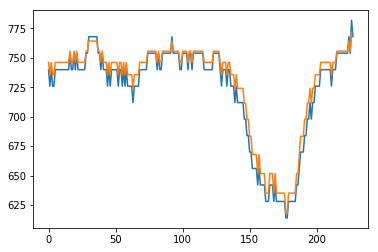

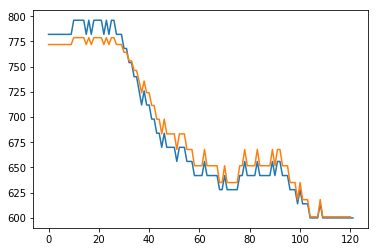

In [0]:
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()

# 预测（二）

## 头文件

In [0]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## 导入数据，画图来查看原图

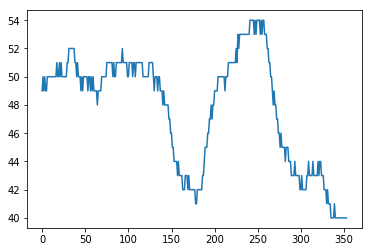

In [0]:
# load the dataset
dataframe = read_csv('train.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()

## 数据做一下转化：
look_back 就是预测下一步所需要的 time steps：

timesteps 就是 LSTM 认为每个输入数据与前多少个陆续输入的数据有联系。例如具有这样用段序列数据 “…ABCDBCEDF…”，当 timesteps 为 3 时，在模型预测中如果输入数据为“D”，那么之前接收的数据如果为“B”和“C”则此时的预测输出为 B 的概率更大，之前接收的数据如果为“C”和“E”，则此时的预测输出为 F 的概率更大

In [0]:
# X is the number of passengers at a given time (t) and Y is the number of passengers at the next time (t + 1).

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

## 数据处理
当激活函数为 sigmoid 或者 tanh 时，要把数据正则话，此时 LSTM 比较敏感
设定 67% 是训练数据，余下的是测试数据

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# split into train and test sets
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

## X=t and Y=t+1 时的数据，并且此时的维度为 [samples, features]

In [0]:
# use this function to prepare the train and test datasets for modeling
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

## 投入到 LSTM 的 X 需要有这样的结构： [samples, time steps, features]，所以做一下变换

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## 建立 LSTM 模型：
输入层有 1 个input，隐藏层有 4 个神经元，输出层就是预测一个值，激活函数用 sigmoid，迭代 100 次，batch size 为 1

In [0]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 6s - loss: 0.1695
Epoch 2/100
 - 1s - loss: 0.0265
Epoch 3/100
 - 1s - loss: 0.0183
Epoch 4/100
 - 1s - loss: 0.0120
Epoch 5/100
 - 1s - loss: 0.0069
Epoch 6/100
 - 1s - loss: 0.0039
Epoch 7/100
 - 1s - loss: 0.0026
Epoch 8/100
 - 1s - loss: 0.0022
Epoch 9/100
 - 1s - loss: 0.0021
Epoch 10/100
 - 1s - loss: 0.0021
Epoch 11/100
 - 1s - loss: 0.0021
Epoch 12/100
 - 1s - loss: 0.0021
Epoch 13/100
 - 1s - loss: 0.0021
Epoch 14/100
 - 1s - loss: 0.0021
Epoch 15/100
 - 1s - loss: 0.0021
Epoch 16/100
 - 1s - loss: 0.0021
Epoch 17/100
 - 1s - loss: 0.0021
Epoch 18/100
 - 1s - loss: 0.0022
Epoch 19/100
 - 1s - loss: 0.0021
Epoch 20/100
 - 1s - loss: 0.0021
Epoch 21/100
 - 1s - loss: 0.0021
Epoch 22/100
 - 1s - loss: 0.0021
Epoch 23/100
 - 1s - loss: 0.0021
Epoch 24/100
 - 1s - loss: 0.0022
Epoch 25/100
 - 1s - loss: 0.0020
Epoch 26/100
 - 1s - loss: 0.0021
Epoch 27/100
 - 1s - loss: 0.0021
Epoch 28/100
 - 1s - loss: 0.0020
Epoch 29/100
 - 1s - loss: 0.0021
Epoch 30/100
 - 1s - lo

## 预测：

In [0]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [0]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

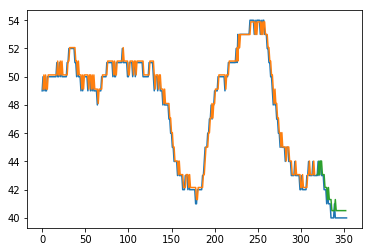

In [0]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()